In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separar columnas y filas

In [2]:
# Cargar los datos originales
df = pd.read_csv('../data/Clima.csv')

# Dividir los datos en caracteristicas (x) y etiquetas (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

In [3]:
# Contar los valores de las etiquetas
cuantos = y.value_counts()

print(cuantos)

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


# Entrenar modelos

In [11]:
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Dividir los registros en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Red Neuronal

In [6]:
# Crear y entrenar el modelo MPL
modelo = MLPClassifier(hidden_layer_sizes=(
    10, 5), max_iter=1500, random_state=42, learning_rate='adaptive')
modelo.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate='adaptive',
              max_iter=1500, random_state=42)

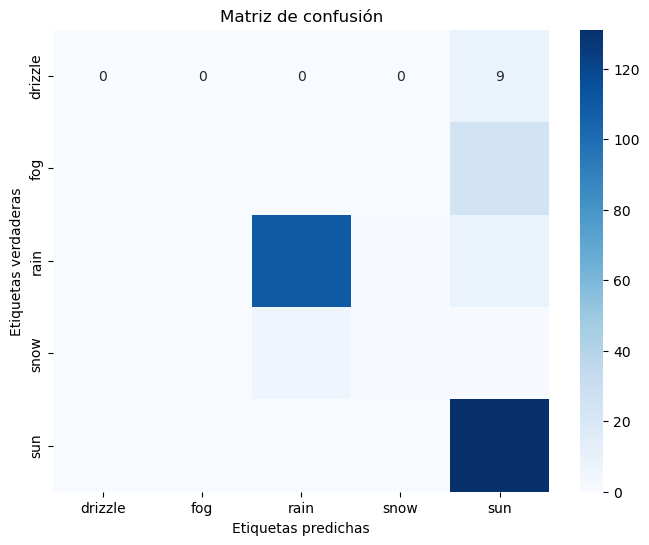

Precisión del Clasificador MLP: 82.5938566552901 %


['../models/ann.joblib']

In [7]:
# Obtener los resultados del entrenamiento
y_pred = modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()
print("Precisión del Clasificador MLP:", accuracy * 100, "%")
dump(modelo, '../models/ann.joblib')

## KNN

In [8]:
# Entrenar clasificador KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
# Realizar predicciones sobre el conjunto de prueba y calcular la precisión
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

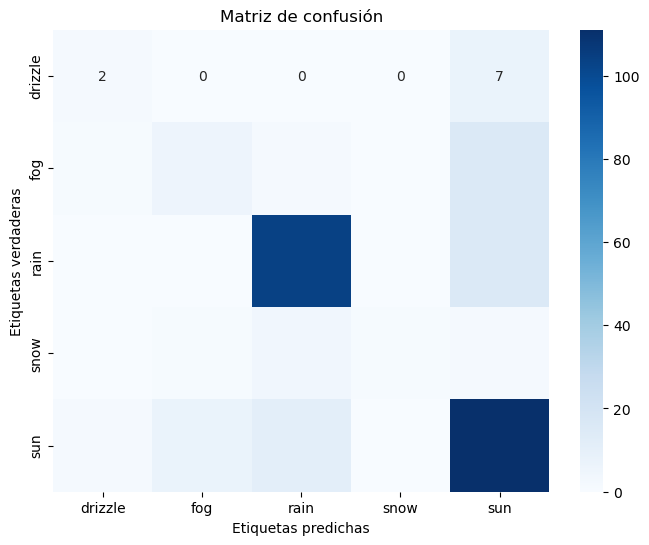

Precisión del Clasificador KNN: 76.45051194539249 %


['../models/knn.joblib']

In [10]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()
print("Precisión del Clasificador KNN:", accuracy * 100, "%")
# Exportar modelo
dump(knn, '../models/knn.joblib')

## Bosque Aleatorio

In [13]:
# Creando y entrenando el modelo
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Realizando predicciones
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

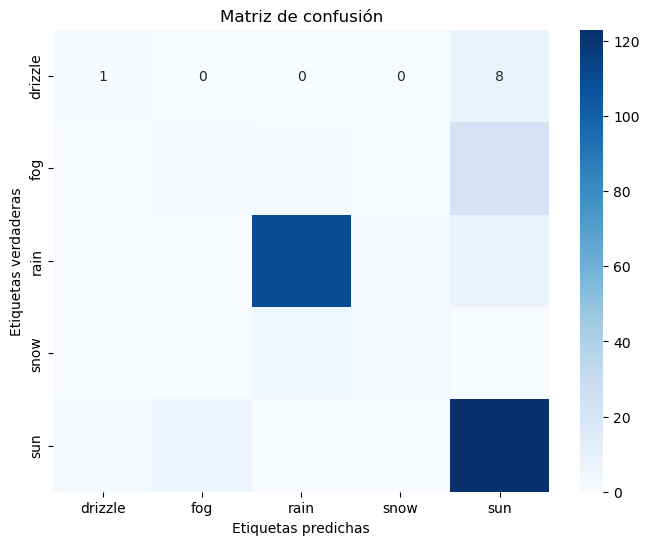

Precisión del Clasificador Bosque Aleatorio: 81.56996587030717 %


['../models/rf_model.joblib']

In [15]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()
print("Precisión del Clasificador Bosque Aleatorio:", accuracy * 100, "%")
# Exportar modelo
dump(rf_model, '../models/rf_model.joblib')